A barcode is a visual, machine-readable representation of data. The data in general carries information about the object that carries the barcode. Traditional barcodes systematically represent data by varying the widths and spacings of parallel lines, and may be referred to as linear or one-dimensional (1D). Later, two-dimensional (2D) variants were developed, using rectangles, dots, hexagons and other geometric patterns, called matrix codes or 2D barcodes. Initially, barcodes were only scanned by special optical scanners called barcode readers but now with the development of application software, devices that could read images, such as smartphones are also being utilized to read them. 

QR is a matrix barcode. The data is stored in horizontal and vertical black square grid patterns on a white background. In general, QR codes often contain data for a locator, identifier, or tracker that points to a website or application. A QR code uses four standardized encoding modes (numeric, alphanumeric, byte/binary, and kanji) to store data efficiently; extensions may also be used.

In this markdown, we shall read and generate QR and bar codes using Python's pyzbar and [qrtools]('https://www.geeksforgeeks.org/reading-generating-qr-codes-python-using-qrtools/')

## Reading QR and BAR codes

### Installation

In [6]:
#https://www.pyimagesearch.com/2018/05/21/an-opencv-barcode-and-qr-code-scanner-with-zbar/
#brew install zbar
#!pip install pyzbar

import sys

### Import required libraries

In [7]:
from __future__ import print_function
import pyzbar.pyzbar as pyzbar
import numpy as np
import cv2

### Create necessary functions

We would create 2 functions in this markdown,similar to the tutorial outlined [here]('https://www.pyimagesearch.com/2018/05/21/an-opencv-barcode-and-qr-code-scanner-with-zbar') 
    1. Decode the code
    2. Display the code

In [8]:
def decode(im) : 
  # Find barcodes and QR codes
  decodedObjects = pyzbar.decode(im)
 
  # Print results
  for obj in decodedObjects:
    print('Type : ', obj.type)
    print('Data : ', obj.data,'\n')
     
  return decodedObjects

In [9]:
# Display barcode and QR code location  
def display(im, decodedObjects):
 
  # Loop over all decoded objects
  for decodedObject in decodedObjects: 
    points = decodedObject.polygon
 
    # If the points do not form a quad, find convex hull
    if len(points) > 4 : 
      hull = cv2.convexHull(np.array([point for point in points], dtype=np.float32))
      hull = list(map(tuple, np.squeeze(hull)))
    else : 
      hull = points;
     
    # Number of points in the convex hull
    n = len(hull)
 
    # Draw the convext hull
    for j in range(0,n):
      cv2.line(im, hull[j], hull[ (j+1) % n], (255,0,0), 3)
 
  # Display results 
  cv2.imshow("Results", im)
  # Press any key to close the window
  cv2.waitKey(0)
  cv2.destroyAllWindows()

### Invoke the functions

In [ ]:
# Read image
im = cv2.imread('qr1.png')
 
decodedObjects = decode(im)
display(im, decodedObjects)

Type :  QRCODE
Data :  b'http://www.qrstuff.com' 



## Writing QR and BAR codes

### Installation

In [ ]:
import sys

!pip install qrcode
!pip install python-barcode

### Import required libraries

In [7]:
import qrcode
import barcode
from barcode import generate
from barcode.writer import ImageWriter

### Invoke the functions

#### Generate QR code

In [8]:
img = qrcode.make(data = 'Business Analytics')

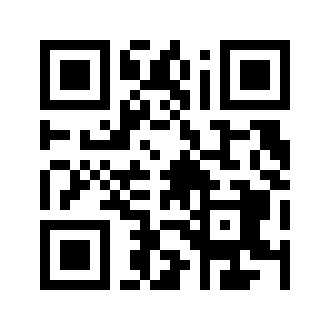

In [9]:
img

#### Generate BAR code

There are multiple ways to generate barcode using 'barcode' library based on the output format desired as detailed in [here]('https://pypi.org/project/pyBarcode/'). Here we would generate the output in png and svg(default) format.

In [10]:
name = generate('EAN13', '123748597546546', output='barcode_1')

In [11]:
name

u'barcode_1.svg'

In [12]:
EAN = barcode.get_barcode_class('ean13')
ean = EAN(u'5901234123457', writer=ImageWriter())
fullname = ean.save('barcode_2')

In [13]:
fullname

u'barcode_2.png'